In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#                   Analysis of Variance(ANOVA)

In [2]:
races = ['asian','black','hispanic','other','white']
voter_race = np.random.choice(a=races,
                             p=[0.05,0.15,0.25,0.05,0.5],
                             size=1000)
voter_age =stats.poisson.rvs(loc=18,
                             mu=30,
                             size=1000)
voter_frame=pd.DataFrame({'race':voter_race,'age':voter_age})
groups = voter_frame.groupby('race').groups

In [3]:
asian = voter_age[groups['asian']]
black = voter_age[groups['black']]
hispanic = voter_age[groups['hispanic']]
other= voter_age[groups['other']]
white = voter_age[groups['white']]

In [4]:
stats.f_oneway(asian,black,hispanic,other,white)

F_onewayResult(statistic=0.8808626495268265, pvalue=0.47472894747384176)

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('age ~ race',
         data=voter_frame).fit()
anova_result = sm.stats.anova_lm(model,type=2)
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
race,4.0,100.994081,25.248520,0.880863,0.474729
Residual,995.0,28520.084919,28.663402,NaN,NaN


# p-values comparison

In [7]:
race_pairs = []
for race1 in range(4):
    for race2 in range(race1+1,5):
        race_pairs.append((races[race1],races[race2]))
        
for race1,race2 in race_pairs:
    print(race1,race2)
    print(stats.ttest_ind(voter_age[groups[race1]],voter_age[groups[race2]]))

asian black
Ttest_indResult(statistic=-0.17504488874705768, pvalue=0.8612455735920191)
asian hispanic
Ttest_indResult(statistic=0.7660318251392396, pvalue=0.44424024780784377)
asian other
Ttest_indResult(statistic=-0.004762474472832836, pvalue=0.9962100960437156)
asian white
Ttest_indResult(statistic=0.7606882738643037, pvalue=0.4471734663170829)
black hispanic
Ttest_indResult(statistic=1.4605171095939593, pvalue=0.14493300246727284)
black other
Ttest_indResult(statistic=0.1857609217149826, pvalue=0.8528357678384882)
black white
Ttest_indResult(statistic=1.5447547079775192, pvalue=0.12290537286223714)
hispanic other
Ttest_indResult(statistic=-0.8456829453055331, pvalue=0.39836352008508125)
hispanic white
Ttest_indResult(statistic=-0.06920260131626474, pvalue=0.9448463897990645)
other white
Ttest_indResult(statistic=0.8407003048738276, pvalue=0.40087985852175334)


# TukeyHSD

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,0.1696,0.9998,-2.3725,2.7118,False
asian,hispanic,-0.6662,0.9405,-3.0461,1.7137,False
asian,other,0.0051,1.0,-2.9788,2.9891,False
asian,white,-0.6384,0.9423,-2.9389,1.6621,False
black,hispanic,-0.8358,0.5787,-2.3838,0.7121,False
black,other,-0.1645,0.9997,-2.5386,2.2096,False
black,white,-0.808,0.529,-2.2309,0.615,False
hispanic,other,0.6714,0.92,-1.5281,2.8708,False
hispanic,white,0.0279,1.0,-1.0794,1.1351,False
other,white,-0.6435,0.9206,-2.7568,1.4698,False


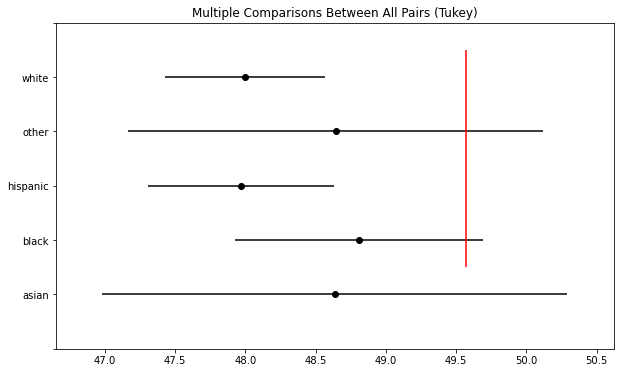

In [8]:
import matplotlib.pyplot as plt

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=voter_age,
                         groups=voter_race,
                         alpha=0.05)
tukey.plot_simultaneous()
plt.vlines(x=49.57,ymin=0.5,ymax=4.5,color='red')
tukey.summary()

# 1.Completely Randomized Desing(CRD)

In [27]:
treat = ['160','180','200','220']
treat1= np.repeat(treat,5)
dat = [575,542,530,539,570,
      565,593,590,579,610,
      600,651,610,637,629,
      725,700,715,685,710]

etch=pd.DataFrame(dat,columns=['Rate'])
power=pd.DataFrame(treat1,columns=['Power'])

df=pd.concat([power,etch],axis=1)
df['Rate']= df['Rate'].astype('float')
df

,Power,Rate
0,160,575.0
1,160,542.0
2,160,530.0
3,160,539.0
4,160,570.0
5,180,565.0
6,180,593.0
7,180,590.0
8,180,579.0
9,180,610.0


In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('Rate ~ Power',
         data=df).fit()
anova_result = sm.stats.anova_lm(model,type=2)
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
Power,3.0,66870.55,22290.183333,66.797073,2.882866e-09
Residual,16.0,5339.20,333.700000,NaN,NaN


# 2.Randomized Complete Block Desing(RCBD)

In [29]:
# Importing libraries
import numpy as np
import pandas as pd
  
# Create a dataframe
df = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15),
                          'Watering': np.repeat(['daily', 'weekly'], 15),
                          'height': [14, 16, 15, 15, 16, 13, 12, 11, 14, 
                                     15, 16, 16, 17, 18, 14, 13, 14, 14, 
                                     14, 15, 16, 16, 17, 18, 14, 13, 14, 
                                     14, 14, 15]})
df

,Fertilizer,Watering,height
0,daily,daily,14
1,daily,daily,16
2,daily,daily,15
3,daily,daily,15
4,daily,daily,16
5,daily,daily,13
6,daily,daily,12
7,daily,daily,11
8,daily,daily,14
9,daily,daily,15


In [30]:
# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
# Performing two-way ANOVA
model = ols(
    'height ~ C(Fertilizer) + C(Watering) +\
    C(Fertilizer):C(Watering)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Fertilizer),1.014891e-12,1.0,3.674605e-13,1.000000
C(Watering),4.315476e-02,1.0,1.562500e-02,0.901417
C(Fertilizer):C(Watering),3.333333e-02,1.0,1.206897e-02,0.913305
Residual,7.733333e+01,28.0,NaN,NaN


# 3.Factorial Design

In [31]:
k = pd.DataFrame(
    {
    'Material':['A1','A1','A1','A1','A1','A1','A1','A1','A1','A1','A1','A1',
            'A2','A2','A2','A2','A2','A2','A2','A2','A2','A2','A2','A2',
            'A3','A3','A3','A3','A3','A3','A3','A3','A3','A3','A3','A3'],
    'Temp':['l5','l5','70','70','125','125'] * 6 ,
        
    'Result':[130,155,34,40,20,70,
             74,180,80,75,82,58,
             150,188,136,122,25,70,
             159,126,106,115,58,45,
             138,110,174,120,96,104,
             168,160,150,139,82,60]
          
    }
)
k

,Material,Temp,Result
0,A1,l5,130
1,A1,l5,155
2,A1,70,34
3,A1,70,40
4,A1,125,20
5,A1,125,70
6,A1,l5,74
7,A1,l5,180
8,A1,70,80
9,A1,70,75


In [32]:
# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
# Performing two-way ANOVA
model = ols(
    'Result ~ C(Material) + C(Temp) + \
    C(Temp):C(Material)', data=k).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Material),10683.722222,2.0,7.911372,1.976083e-03
C(Temp),39118.722222,2.0,28.967692,1.908596e-07
C(Temp):C(Material),9613.777778,4.0,3.559535,1.861117e-02
Residual,18230.750000,27.0,NaN,NaN


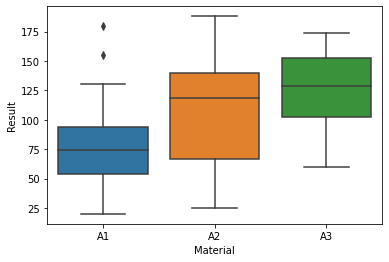

In [33]:
import seaborn as sns
ax = sns.boxplot(x='Material',y='Result',data=k)

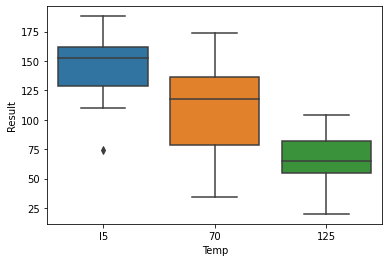

In [34]:
import seaborn as sns
ax = sns.boxplot(x='Temp',y='Result',data=k)

<Figure size 864x432 with 0 Axes>

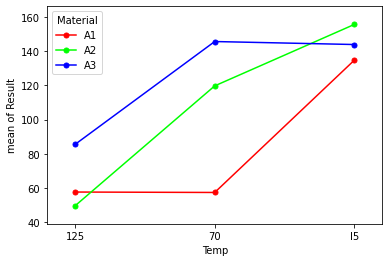

In [35]:
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
fig = interaction_plot(k.Temp,k.Material,k.Result,ms=10)

#   4.  2^k Factorial Design

In [10]:
k=pd.DataFrame({
             'A' : [-1,+1,-1,+1],
             'B' : [-1,-1,+1,+1],
              'I':[28,36,18,31],
              'II':[25,32,19,30],
               'III':[27,32,23,29]
             }
            )
k.index = [['(1)','a','b','ab']]

In [11]:
k['Total']=k.iloc[:,2:].sum(axis=1)
k['Final'] = k['A'] *k['B'] * k['Total']
k

,A,B,I,II,III,Total,Final
(1),-1,-1,28,25,27,80,80
a,1,-1,36,32,32,100,-100
b,-1,1,18,19,23,60,-60
ab,1,1,31,30,29,90,90


# EFFECTS

In [13]:
EffectA = (k.iloc[1,-1] + k.iloc[3,-1] - k.iloc[0,-1] - k.iloc[2,-1])/(2 * 3) 
EffectB = (k.iloc[2,-1] + k.iloc[3,-1] - k.iloc[0,-1] - k.iloc[1,-1])/(2 * 3)
EffectC = (k.iloc[3,-1] + k.iloc[0,-1] +  k.iloc[1,-1] + k.iloc[2,-1])/(2 * 3)

print('Effect A:',EffectA)
print('Effect :B',EffectB)
print('Effect : C',EffectC)

Effect A: -5.0
Effect :B 8.333333333333334
Effect : C 1.6666666666666667


# CONTRAST

In [14]:
ContrastA = (k.iloc[1,-1] + k.iloc[3,-1] - k.iloc[0,-1] - k.iloc[2,-1])
ContrastB = (k.iloc[2,-1] + k.iloc[3,-1] - k.iloc[0,-1] - k.iloc[1,-1])
ContrastC = (k.iloc[3,-1] + k.iloc[0,-1] +  k.iloc[1,-1] + k.iloc[2,-1])

In [15]:
print('Contrast A:',ContrastA)
print('Contrast B',ContrastB)
print('Contrast C',ContrastC)

Contrast A: -30
Contrast B 50
Contrast C 10


# SUM of SQUARES

In [16]:
SS_A = ((ContrastA)**2)/(3*4)
SS_B = ((ContrastB)**2)/(3*4)
SS_C = ((ContrastC)**2)/(3*4)

In [17]:
print('SS A',SS_B)
print('SS B',SS_A)
print('SS C',SS_C)

SS A 208.33333333333334
SS B 75.0
SS C 8.333333333333334


# MEAN SQUARE ERROR

In [18]:
MS_B= SS_B/1
MS_A = SS_A/1
MS_C = SS_C/1

print('MS A:',SS_B/1)
print('MS B:',SS_A/1)
print('MS C:',SS_C/1)

MS A: 208.33333333333334
MS B: 75.0
MS C: 8.333333333333334


# SUM OF SQUARE OF TOTAL(SST)

In [19]:
all_val = []
for i in k.iloc[:,2:5]:
    val = k[i].values
    for j in val:
        all_val.append(j)

In [20]:
avg = np.mean(all_val)
print('mean:',avg)
print('Values:',all_val)

mean: 27.5
Values: [28, 36, 18, 31, 25, 32, 19, 30, 27, 32, 23, 29]


In [21]:
ds = []
for i in all_val:
    ds1 = np.sum((i-avg)**2)
#     print(ds1)
    ds.append(ds1)
    
sst = np.sum(ds)
msq = np.sum(ds)/(len(all_val)-1)

In [22]:
sst

323.0

In [23]:
msq

29.363636363636363

# SUM OF SQUARE OF ERROR

In [24]:
SSE = sst -SS_B-SS_A-SS_C
SSE

31.33333333333332

In [25]:
MSE = sst -SS_B-SS_A-SS_C
MSE = SSE/8
MSE

3.916666666666665

# ANOVA TABLE

In [26]:
n=len(all_val)
df=pd.DataFrame([
    
             [SS_B,1,SS_B/1, 53.15,0.0001],
             [SS_A,1,SS_A/1,19.13,0.0024],
             [SS_C,1,SS_C/1,2.13, 0.1826],
             [SSE, 8,SSE/8, "NA", "NA"],
             [sst,n-1,sst/n-1,'NA','NA']
]

)
df.index = [['A',"B","AB","Error","Total"]]
df.columns= [['Sum of Squares','Degree of Freedom','Mean square','F-Critical','P-value']]
df.index.rename('Sources of Variation',inplace=True)
df

,Sum of Squares,Degree of Freedom,Mean square,F-Critical,P-value
Sources of Variation,,,,,
A,208.333333,1,208.333333,53.15,0.0001
B,75.000000,1,75.000000,19.13,0.0024
AB,8.333333,1,8.333333,2.13,0.1826
Error,31.333333,8,3.916667,NA,NA
Total,323.000000,11,25.916667,NA,NA
